## Youtube Channels Dataset Exploratory Data Analysis

#### 0.1 Intent
The purpose of this project is to explore a dataset containing information about the top subscribed youtube channels. The dataset is from Kaggle. I will be using Python packages pandas, numpy, matplotlib, and seaborn to manipulate data and create visuals. This project will focus on analysis by start year, features of top channels, correlations between variables, and categorical analysis.

#### 0.2 Data Description
This dataset contains 1000 records of data on top subscribed Youtube channels. The fields include:
- rank: rank of the channel according to the number of subscribers they have
- Youtuber: official name of the channel
- subscribers: number of subscribers the channel has
- video views: number of views across all videos on a given channel
- video count: number of videos the channel has uploaded so far
- category: the category (genre) of the channel
- started: the year the channel was started

This dataset updates monthly, and was downloaded in May 2023. Link: https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data

#### 0.3 Dataset Import and Preview
First, let's load the data.

In [144]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.expand_frame_repr = False

#import dataset and specity data type for each column
df=pd.read_csv('most_subscribed_youtube_channels.csv',
    dtype={'rank': 'int64',
        'subscribers': 'int64',
        'video views':'int64',
        'video count':'int64',
        'category':'category',
        'started':'int64'},
        thousands=',')

print(df.head())
print()
print(df.info())

   rank                    Youtuber  subscribers   video views  video count          category  started
0     1                    T-Series    222000000  198459090822        17317             Music     2006
1     2              YouTube Movies    154000000             0            0  Film & Animation     2015
2     3  Cocomelon - Nursery Rhymes    140000000  135481339848          786         Education     2006
3     4                   SET India    139000000  125764252686        91271             Shows     2006
4     5                       Music    116000000             0            0               NaN     2013

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   rank         1000 non-null   int64   
 1   Youtuber     1000 non-null   object  
 2   subscribers  1000 non-null   int64   
 3   video views  1000 non-null   int64   
 4   video count  

### 1. Preprocessing
#### 1.1 Clean the Data
First of all, we can see that the channels Youtube Movies and Music have zeros in their video views and video count columns, when both of these should be non-zero values. We can also observe that there are 973 records of category data, when there should be 1000. There may be other nulls and zero values, so let's count those up. 

In [145]:
column_names=list(df.columns.values)

#loop through each column and print count of nulls and zeroes
for item in column_names:
    print(item, 'nulls:', df[item].isna().sum())
    print(item, 'zeroes:', df[item].isin([0]).sum())

rank nulls: 0
rank zeroes: 0
Youtuber nulls: 0
Youtuber zeroes: 0
subscribers nulls: 0
subscribers zeroes: 0
video views nulls: 0
video views zeroes: 10
video count nulls: 0
video count zeroes: 10
category nulls: 27
category zeroes: 0
started nulls: 0
started zeroes: 0


I will create a dataframe that contains all of the items that have either a null in the category column, or a zero in the video views or video count columns.

In [146]:
dropping=(df['category'].isna()) | (df['video views'] == 0) | (df['video count'] == 0)
print(df[dropping])
print("There are", len(df[dropping]), "rows with insufficient data")

     rank                                           Youtuber  subscribers  video views  video count          category  started
1       2                                     YouTube Movies    154000000            0            0  Film & Animation     2015
4       5                                              Music    116000000            0            0               NaN     2013
9      10                                             Gaming     92700000            0            0               NaN     2013
15     16                                             Sports     75100000            0            0               NaN     2013
81     82                                               News     36200000            0            0               NaN     2013
137   138                                 Popular on YouTube     29400000            0            0               NaN     2013
163   164                                     Vlad và Nikita     27100000  17117316552          405            

29 rows of insufficient data accounts for only 2% of our total data, so we can drop these values to simplify things. 

In [147]:
df=df.drop(df[dropping].index)

#double check to ensure all nulls and zeroes are gone
for item in column_names:
    print(item, 'nulls:', df[item].isna().sum())
    print(item, 'zeroes:', df[item].isin([0]).sum())
    
print(df.shape)

rank nulls: 0
rank zeroes: 0
Youtuber nulls: 0
Youtuber zeroes: 0
subscribers nulls: 0
subscribers zeroes: 0
video views nulls: 0
video views zeroes: 0
video count nulls: 0
video count zeroes: 0
category nulls: 0
category zeroes: 0
started nulls: 0
started zeroes: 0
(971, 7)


Let's check if there are any duplicate values

In [148]:
#this will print "True" if there is a duplicate, and "False" if there is not
print(df.duplicated(subset=['Youtuber']).any())

#display duplicate values
print(df[df['Youtuber'].duplicated()])

True
     rank            Youtuber  subscribers  video views  video count       category  started
578   579  Bollywood Classics     14500000   6036342725         1147  Entertainment     2011


We see that Bollywood classics has been duplicated, so let's drop row 578 and check again

In [149]:
df=df.drop(578)

#check again, hoping for "False"
print(df.duplicated(subset=['Youtuber']).any())

False


I want to review the numerical data in a separate dataframe. Let's check this out with the describe method.

In [150]:
#create new dataframe numdata
numdata=df[['subscribers','video views', 'video count', 'started']]
print(numdata.describe())

        subscribers   video views    video count      started
count  9.700000e+02  9.700000e+02     970.000000   970.000000
mean   2.024361e+07  9.329287e+09    8802.764948  2012.272165
std    1.479764e+07  1.219517e+10   29775.394977     3.973616
min    1.090000e+07  4.390980e+05       1.000000  1970.000000
25%    1.270000e+07  3.638642e+09     347.750000  2009.000000
50%    1.550000e+07  6.172360e+09     903.500000  2013.000000
75%    2.200000e+07  1.153040e+10    3165.750000  2015.000000
max    2.220000e+08  1.984591e+11  329711.000000  2021.000000


After the above cleaning steps, we have 970 records. Hmmmm.. I see we have a channel that claims to have started in 1970, but Youtube was launched in 2005! Let's do some visualization to check out the outliers in the dataset.

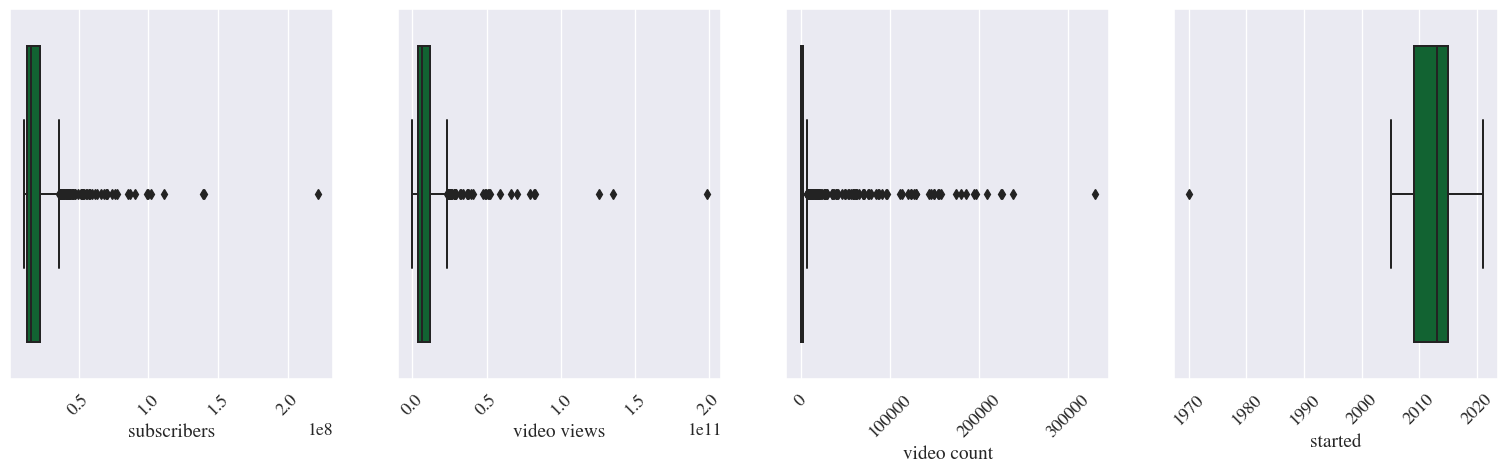

In [151]:
#import relevant libraries and specify some settings for graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={"figure.dpi": 96})
sns.set(font_scale=1.2)
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)
import warnings
warnings.filterwarnings("ignore")

sns.set_palette('BuGn_r')

fig, axs = plt.subplots(1,4,figsize=(20, 5))

sns.boxplot(x=numdata['subscribers'],  data=numdata, ax=axs[0])
sns.boxplot(x=numdata['video views'],  data=numdata, ax=axs[1])
sns.boxplot(x=numdata['video count'],  data=numdata, ax=axs[2])
sns.boxplot(x=numdata['started'],  data=numdata, ax=axs[3])

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)

plt.show()

From this visualization, we can see there there are a good deal of outliers. 
Since it is incorrect data, let's change that channel started in 1970 to 2005, the year Youtube launched.

In [152]:
df['started']=df['started'].replace(1970, 2005)

#export to csv
df.to_csv('most_subscribed_youtube_channels_clean.csv')

#### 1.2 Initial Review

Let's now calculate some averages for our numeric data

In [153]:
#re-instantiate numdata dataframe to pick up changes to the original df
numdata=df[['subscribers','video views', 'video count', 'started']]

#sort by start year
numdata=numdata.sort_values(['started'])
print(numdata.describe().round(2))

        subscribers   video views  video count  started
count  9.700000e+02  9.700000e+02       970.00   970.00
mean   2.024361e+07  9.329287e+09      8802.76  2012.31
std    1.479764e+07  1.219517e+10     29775.39     3.74
min    1.090000e+07  4.390980e+05         1.00  2005.00
25%    1.270000e+07  3.638642e+09       347.75  2009.00
50%    1.550000e+07  6.172360e+09       903.50  2013.00
75%    2.200000e+07  1.153040e+10      3165.75  2015.00
max    2.220000e+08  1.984591e+11    329711.00  2021.00


Average subscriber count: 20,243,608
Average video views: 9,329,287,052
Average video count: 8803

Let's look at the data in a histogram to learn more.

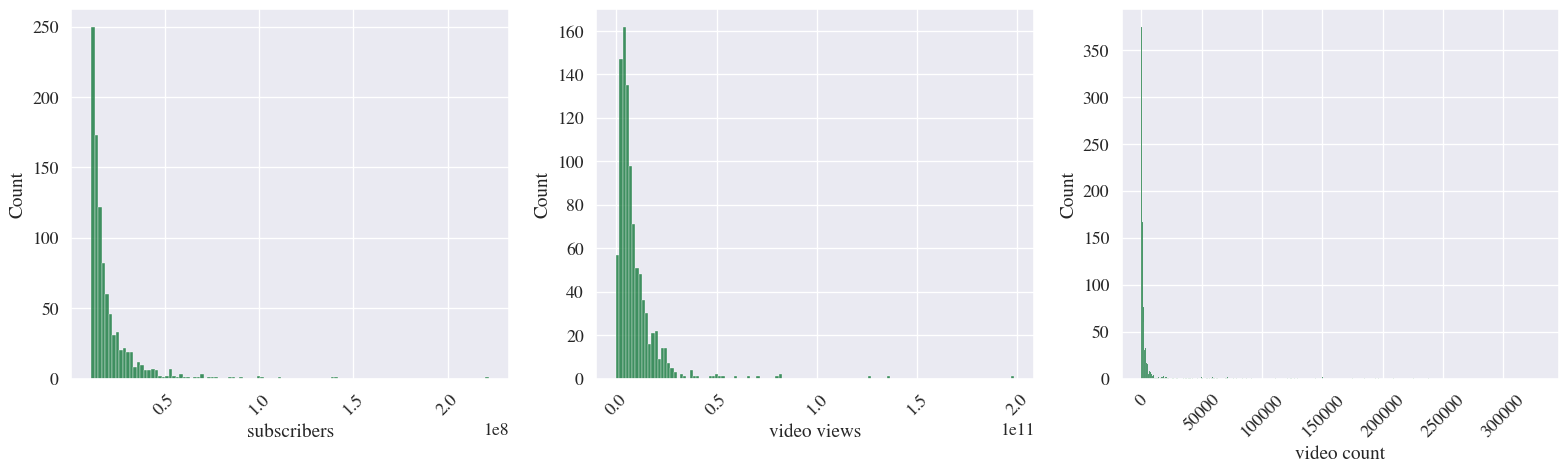

In [154]:
fig, axs = plt.subplots(1,3,figsize=(20, 5))

sns.histplot(x=df['subscribers'],  data=numdata, ax=axs[0])
sns.histplot(x=df['video views'],  data=numdata, ax=axs[1])
sns.histplot(x=df['video count'],  data=numdata, ax=axs[2])

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)

plt.show()

The histograms for subscribers, video views, and video count are all skewed right. It looks like the majority of the data points are smaller numbers. This tracks with our earlier boxplot and standard deviation data- the higher value data points are outliers. Because of this, we will consider the median as a more accurate measure of central tendency.

Median subscriber count: 15,500,000
Median video views: 6,172,359,566
Median video count: 903.5

### 2. Exploratory Data Analysis

#### 2.1 Start Year Analysis

Let's see what we can find out about the year channels were started

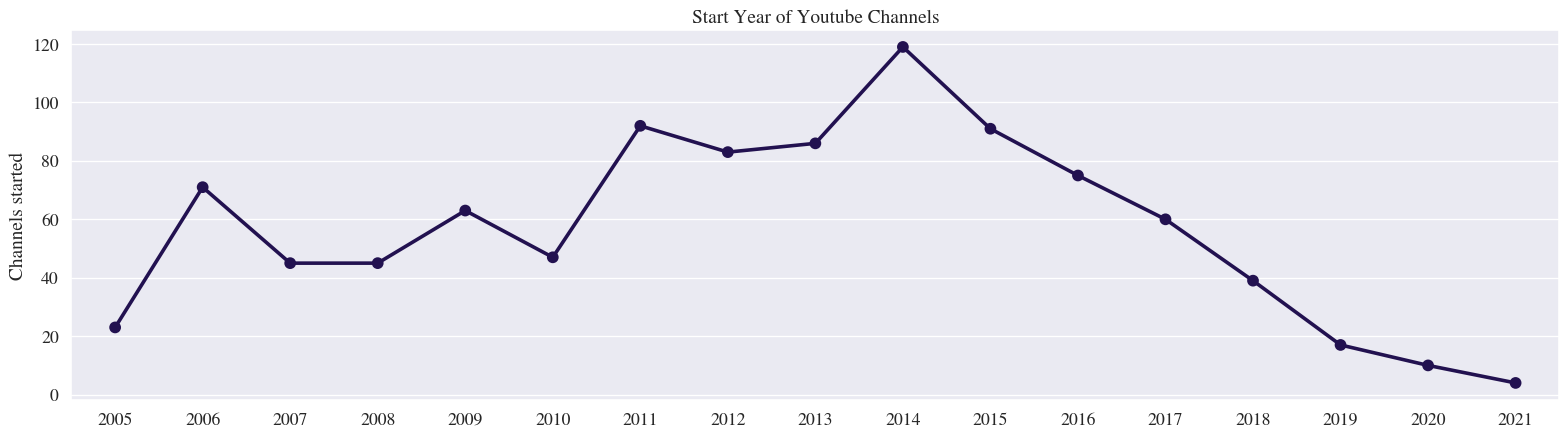

In [155]:
sns.set_palette('magma')

#create new dataframe that groups channels by their start year
starteddf=numdata['started'].value_counts()

plt.figure(figsize=(20, 5))
sns.pointplot(x=starteddf.index, y=starteddf.values)
plt.ylabel('Channels started')
plt.title('Start Year of Youtube Channels')

plt.show()

The majority of channels were made from 2010-2018, with the peak for new channels being in 2014. The trend of making a Youtube channel really dropped off in 2019.

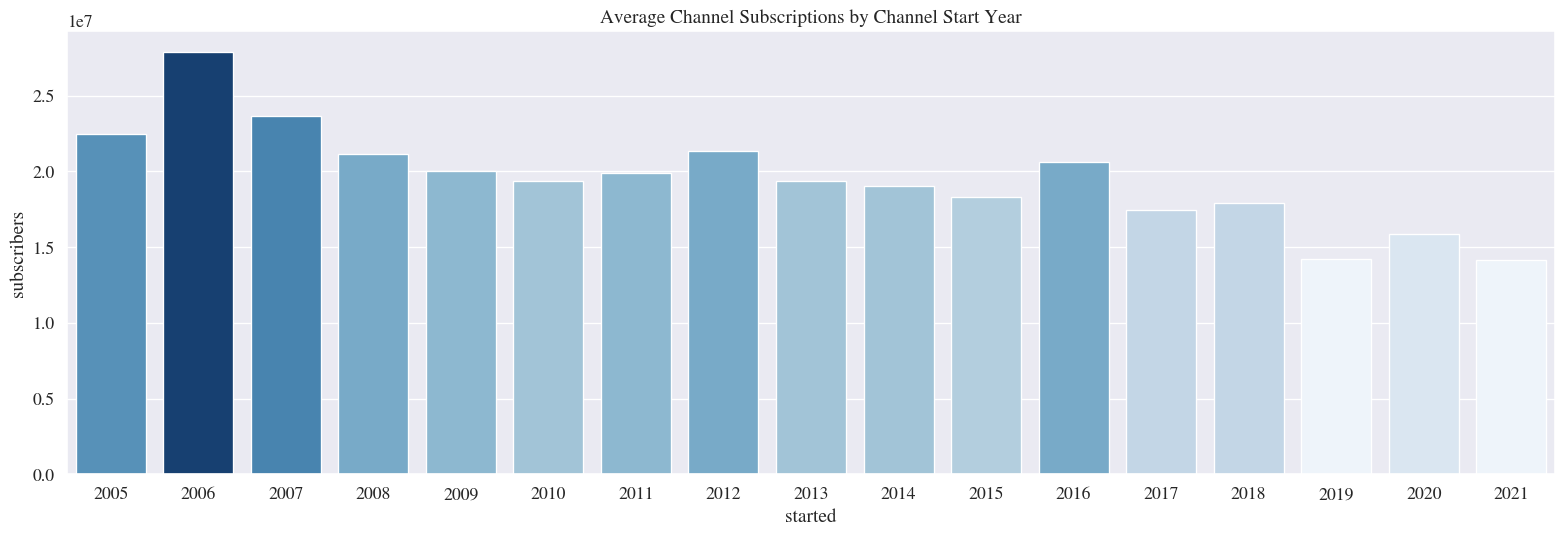

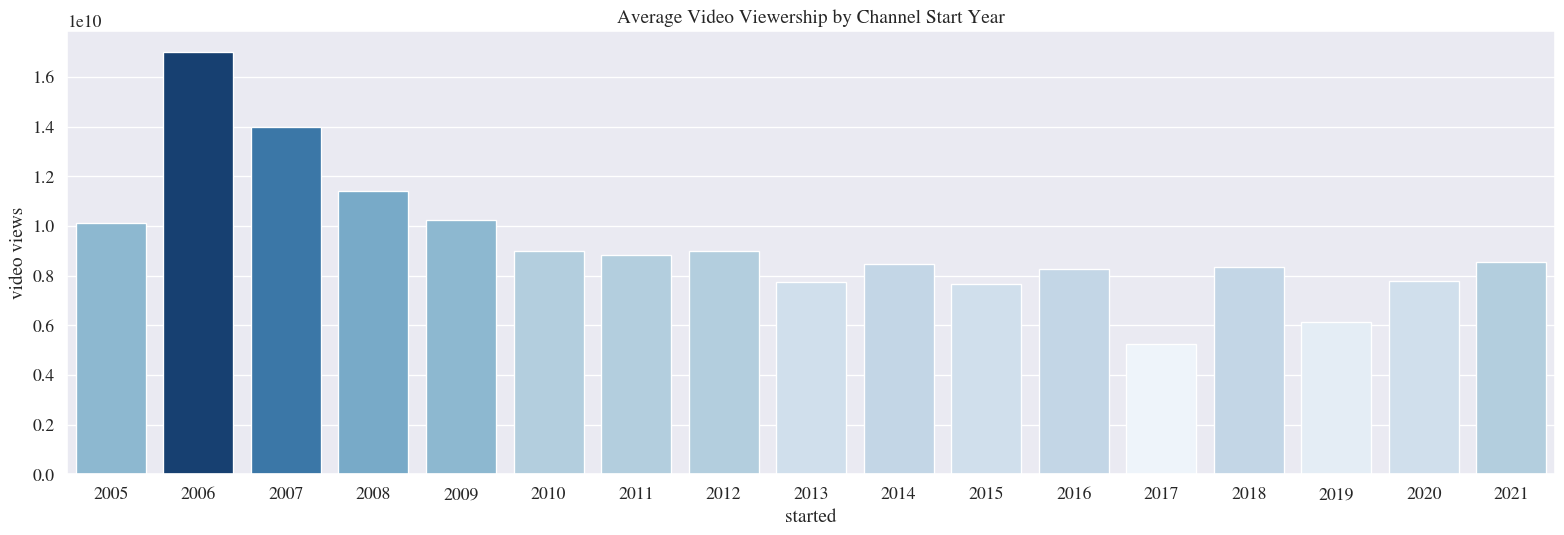

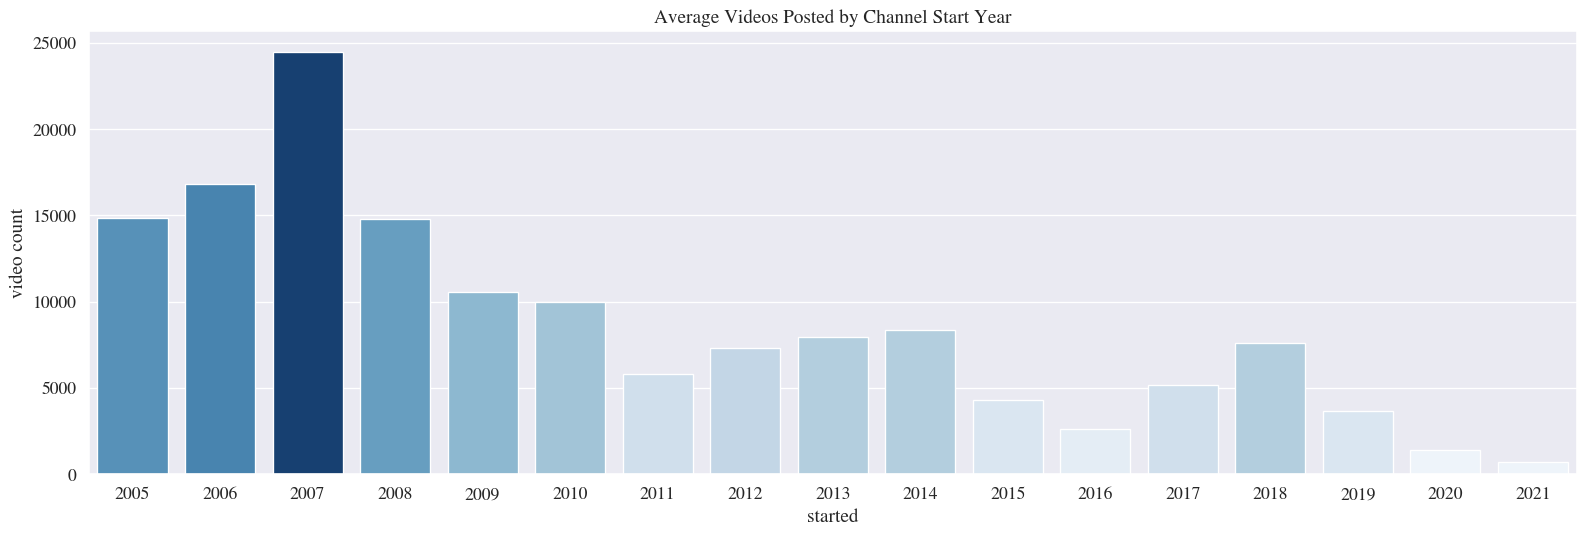

In [156]:
yeardf=numdata.groupby('started').mean().reset_index()
x=yeardf['started']

import numpy as np

def colors_from_values(values, palette_name):
    normalized = (values - min(values)) / (max(values) - min(values))
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

plt.figure(figsize=(20, 6))
sns.barplot(x=x, y=yeardf['subscribers'], palette=colors_from_values(yeardf['subscribers'], "Blues"))
plt.title('Average Channel Subscriptions by Channel Start Year')

plt.figure(figsize=(20, 6))
sns.barplot(x=yeardf['started'], y=yeardf['video views'], palette=colors_from_values(yeardf['video views'], "Blues"))
plt.title('Average Video Viewership by Channel Start Year')

plt.figure(figsize=(20, 6))
sns.barplot(x=yeardf['started'], y=yeardf['video count'], palette=colors_from_values(yeardf['video count'], "Blues"))
plt.title('Average Videos Posted by Channel Start Year')
plt.show()

We can see from these bar graphs that on average, channels started in 2006 have the most subscriptions and video views. Channels started in 2007 have the highest numbers of videos posted. Since these are very early years of Youtube, it is worth noting that having an older channel does provide more of an opportunity to accumulate subscribers, views, and videos simply based on time elapsed.

#### 2.2 Top Channels Analysis

Let's look at some of the top channels by video views, video count, and subscribers

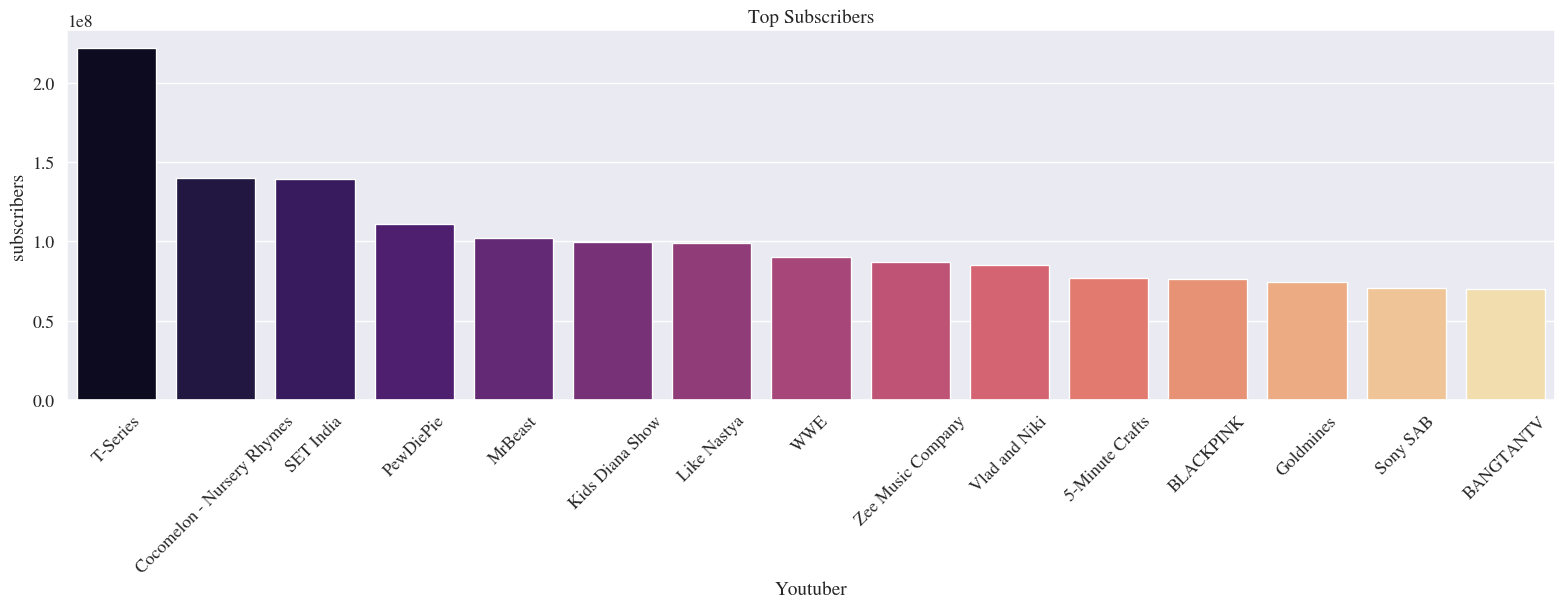

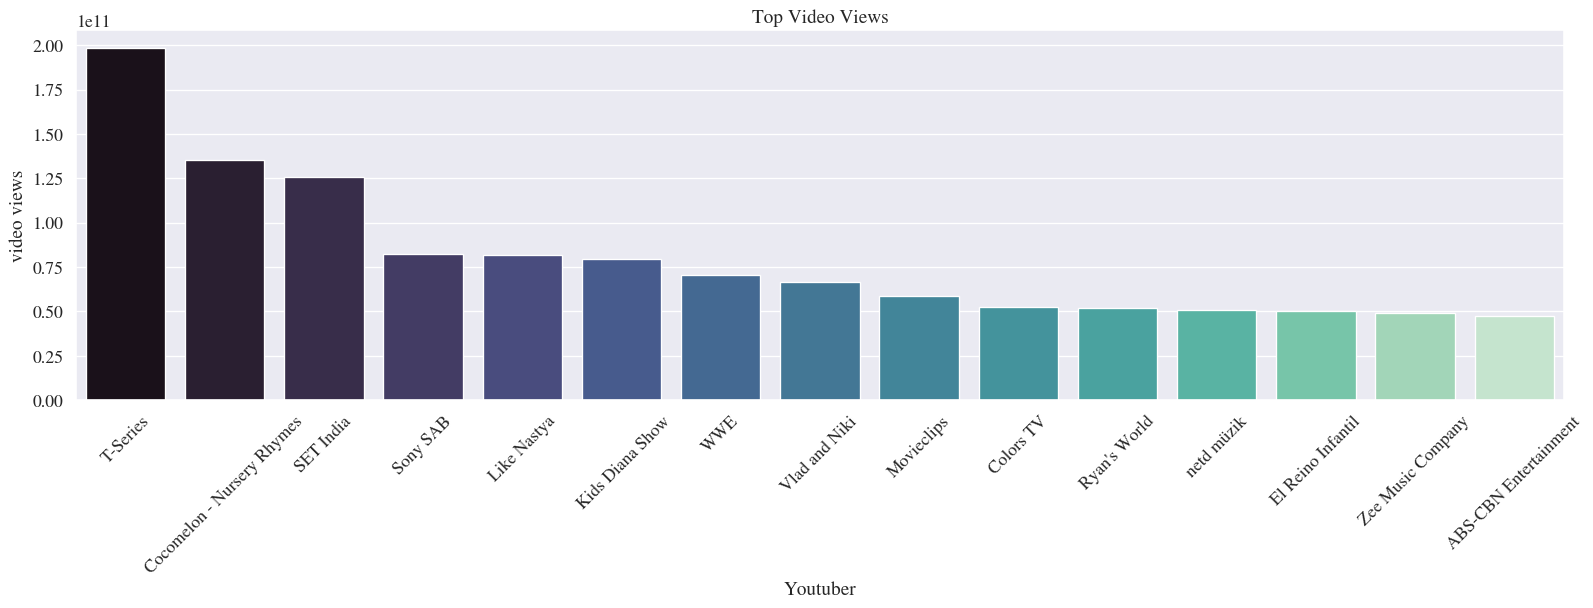

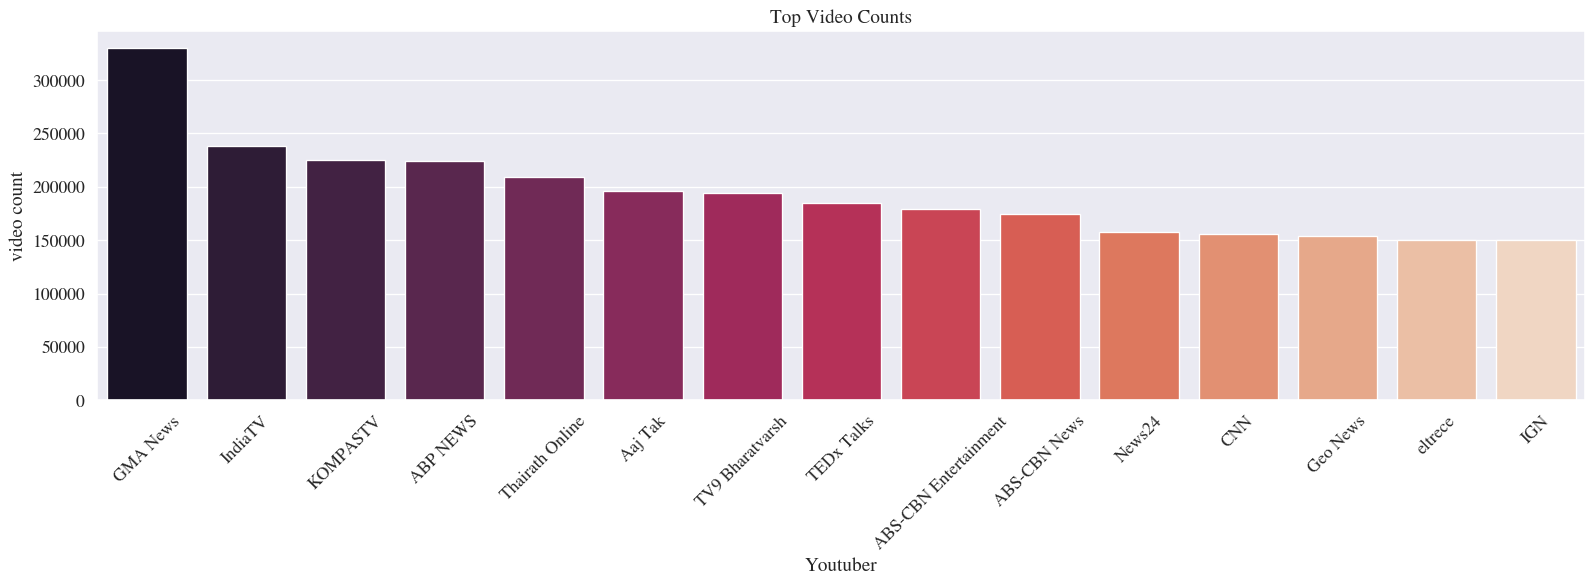

In [157]:
#choosing top 15
subscribersdf=df[:15]

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title('Top Subscribers')
sns.barplot(x='Youtuber', y='subscribers', data=subscribersdf, palette='magma')

vidviewsdf=df.sort_values(by='video views', ascending=False)
vidviewsdf=vidviewsdf[:15]

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title('Top Video Views')
sns.barplot(x='Youtuber', y='video views', data=vidviewsdf, palette='mako')

vidcountdf=df.sort_values(by='video count', ascending=False)
vidcountdf=vidcountdf[:15]

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title('Top Video Counts')
sns.barplot(x='Youtuber', y='video count', data=vidcountdf, palette='rocket')

plt.show()

T-Series has the most subscribers and video views, while GMA News has posted the most videos. An interesting observation here- many of the channels on the top subscribed graph are also on the top viewed graph. Let's check out the correlation between our non-ordinal numeric variables.

#### 2.3 Variable Correlation Analysis

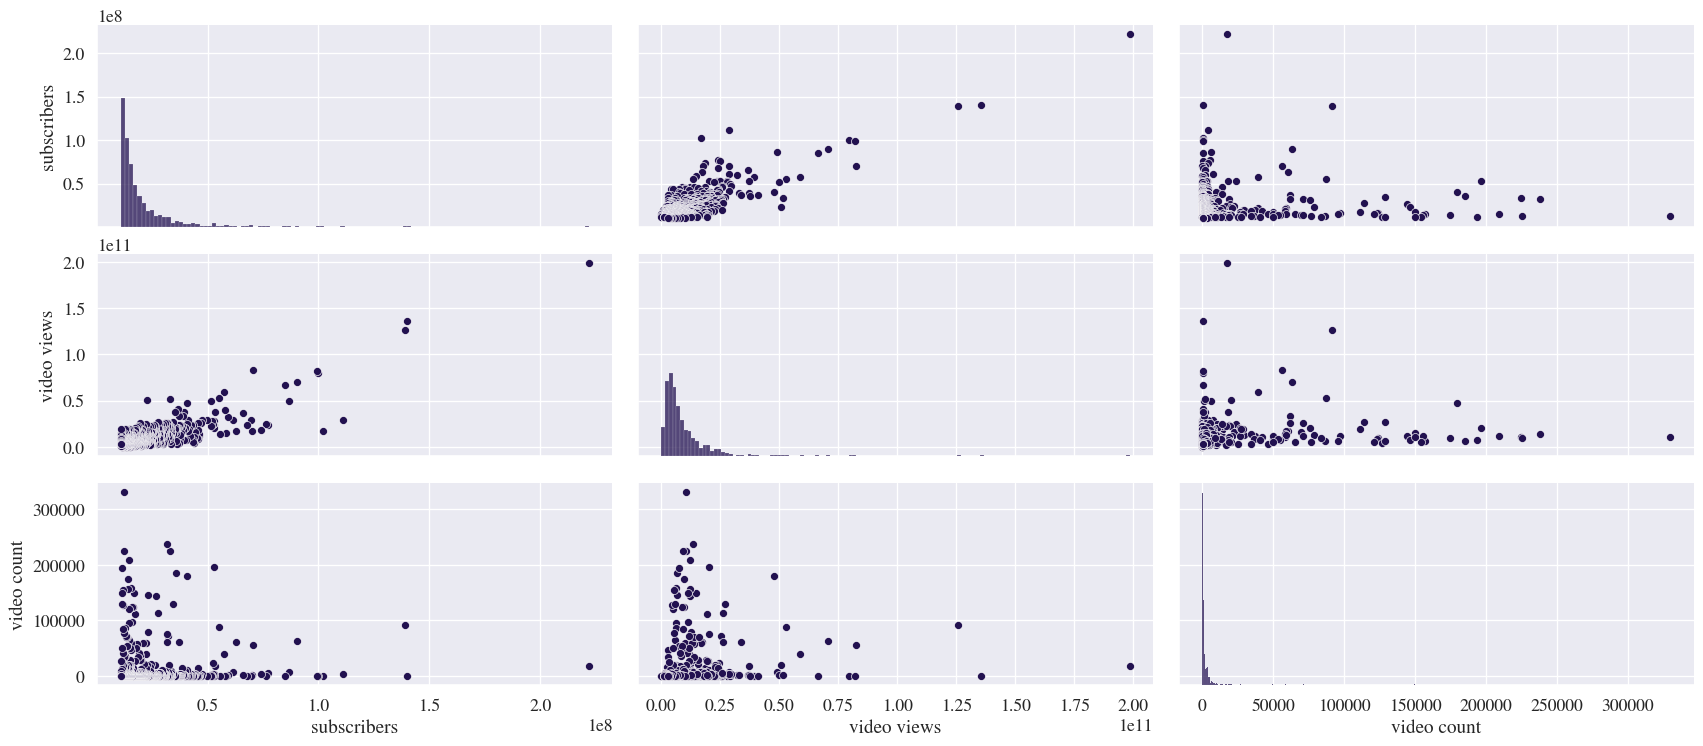

In [158]:
#make a new df with non ordinal numerical data
pairdf=df[['subscribers', 'video views', 'video count']]
g=sns.pairplot(pairdf)
g.fig.set_size_inches(20,8)
plt.show()

It looks like there is a pretty strong positive correlation between subscribers and video views. The correlation between video count and the other two variables seems to be quite weak.

We can further confirm the positive correlation between subscribers and video views with a kernel density estimation. This will help us see how the data is generally distributed.

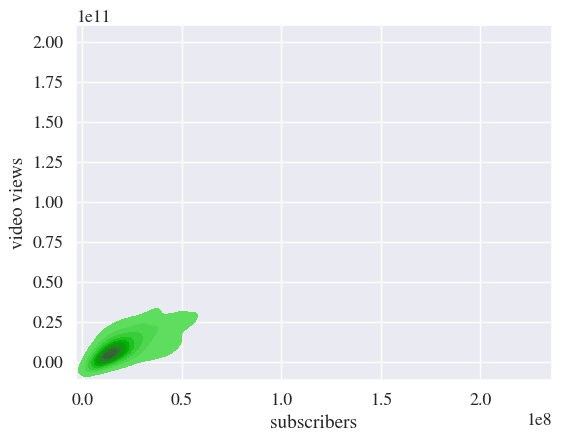

In [159]:
sns.kdeplot(data=pairdf, x=pairdf['subscribers'], y=pairdf['video views'],color='green',fill=True)
plt.show()

It looks like those channels who are in the top 10 subscribed graph but not in the top 10 viewed graph are outliers. The high subscriber counts of channels like Pewdiepie and MrBeast can probably be explained by trends such as the "subscribe to Pewdiepie" movement, which are anomalies.

We can further confirm this information with a heatmap that compares correlations between the variables.

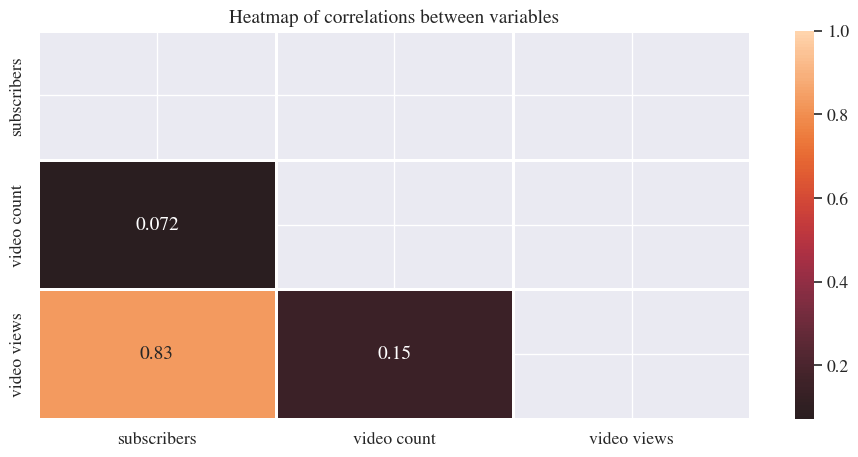

In [160]:
plt.figure(figsize=(10,5))
heatdf=numdata[['subscribers', 'video count', 'video views']]
corr = heatdf.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=1, center=0,annot = True, linewidth=2)
plt.title('Heatmap of correlations between variables')
plt.tight_layout()
plt.show()

We can see that at .83/1.0, there is a strong positive correlation between video views and subscribers. Video count does not correlate strongly with subscribers or video views counts. 

#### 2.4 Categorical Analysis

Now, let's group the data by category.

In [161]:
categorydf = df.groupby('category').size().sort_values(ascending=False).reset_index(name='count')
print(categorydf)

                 category  count
0           Entertainment    240
1                   Music    222
2          People & Blogs    119
3                  Gaming    102
4                  Comedy     63
5        Film & Animation     50
6               Education     46
7           Howto & Style     45
8         News & Politics     27
9    Science & Technology     18
10                  Shows     14
11                 Sports     10
12         Pets & Animals      6
13               Trailers      2
14                 Movies      2
15  Nonprofits & Activism      2
16       Autos & Vehicles      1
17        Travel & Events      1


Let's look at a distribution of the categories present in our data

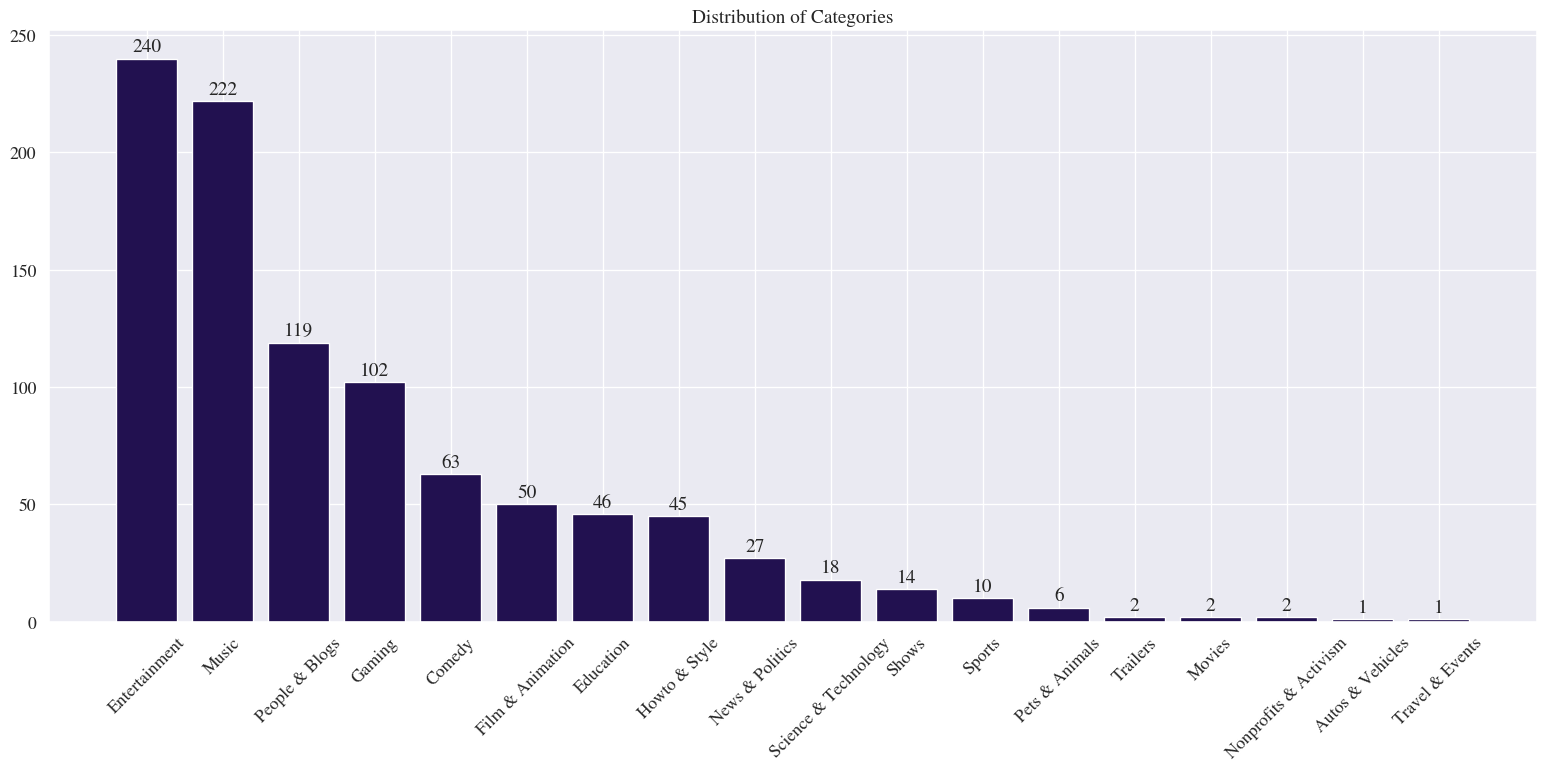

In [162]:
sns.set_palette('magma')

x=categorydf['category']
y=categorydf['count']

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+3, y[i], ha = 'center')

plt.figure(figsize=(20, 8))
plt.xticks(rotation=45)
plt.bar(x,y)
plt.title('Distribution of Categories')
addlabels(x,y)

plt.show()

Among the top subscribed Youtube Channels, Entertainment, Music, People & Blogs, and Gaming are the most popular genres.

Let's look at the subscribers, video views, and video count data by category.

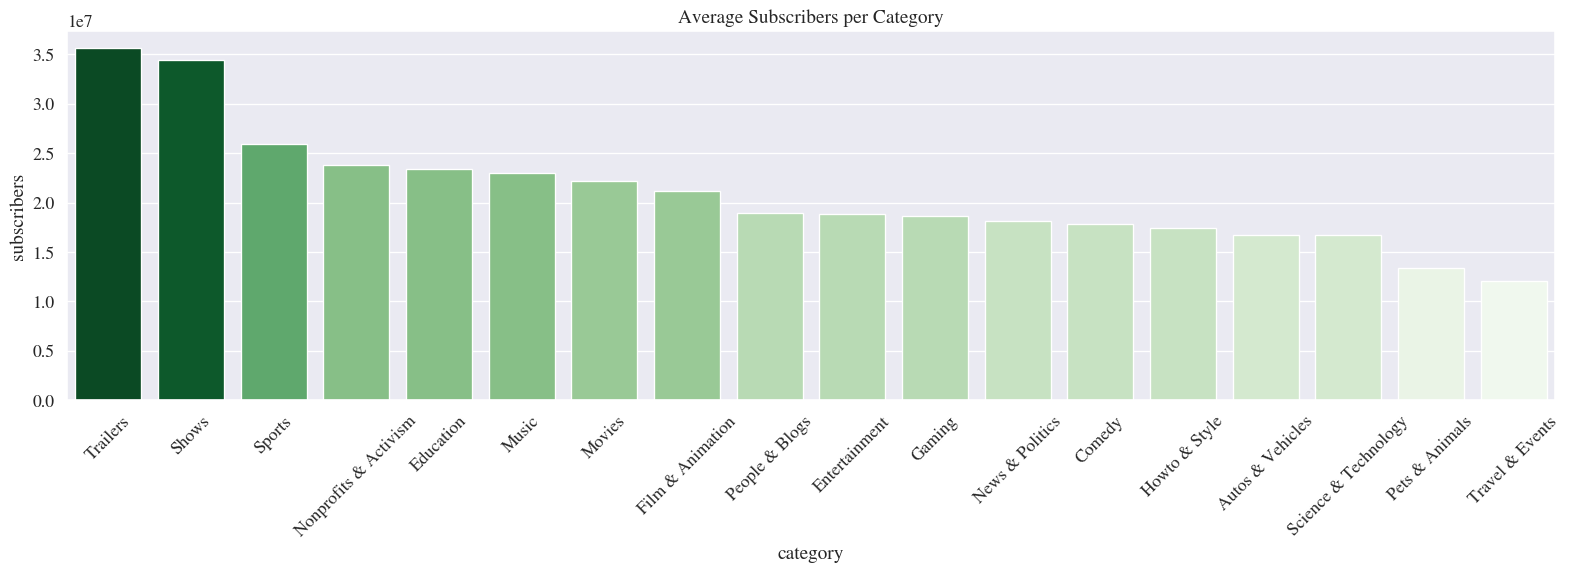

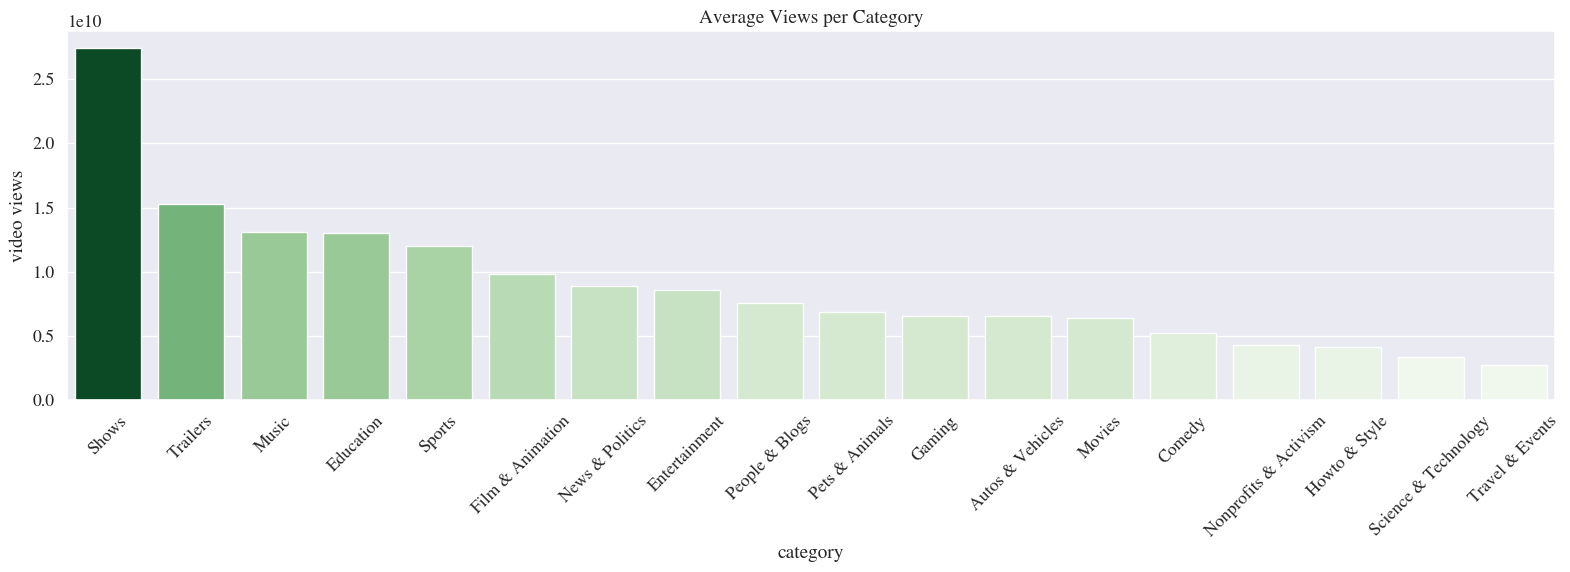

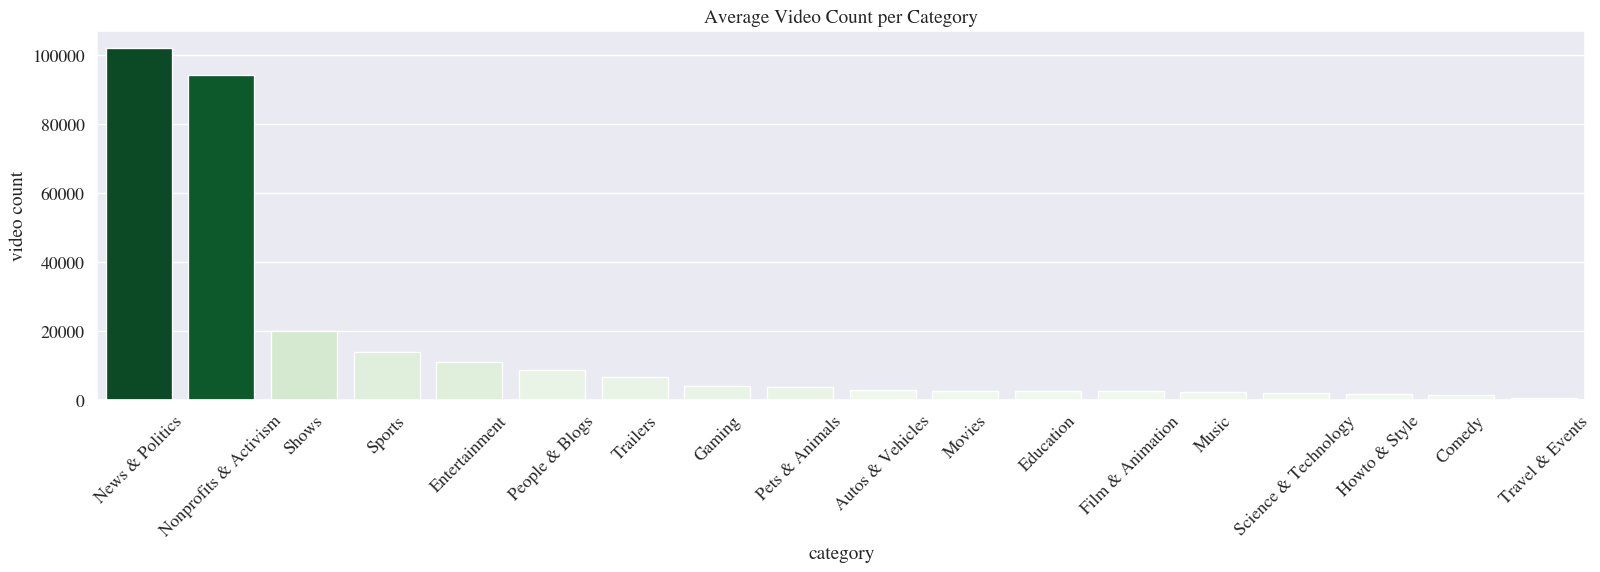

In [163]:
groupsubdata=df.groupby('category', as_index=False)['subscribers'].mean().sort_values('subscribers', ascending=False)
groupviewsdata=df.groupby('category', as_index=False)['video views'].mean().sort_values('video views', ascending=False)
groupcountdata=df.groupby('category', as_index=False)['video count'].mean().sort_values('video count', ascending=False)

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title('Average Subscribers per Category')
sns.barplot(x='category', y='subscribers', data=groupsubdata, palette=colors_from_values(groupsubdata['subscribers'], "Greens"), order=groupsubdata['category'])

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title('Average Views per Category')
sns.barplot(x='category', y='video views', data=groupviewsdata, palette=colors_from_values(groupviewsdata['video views'], "Greens"), order=groupviewsdata['category'])

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title('Average Video Count per Category')
sns.barplot(x='category', y='video count', data=groupcountdata, palette=colors_from_values(groupcountdata['video count'], "Greens"), order=groupcountdata['category'])

plt.show()

There are some interesting observations here. On average, Trailers and Shows channels have very low video counts and relatively high subscriber and video views counts. Channels in the Trailers and Shows genres have lots of viewers and subscribers without having to post many videos. On the other hand, Nonprofits & Activism channels have a very high video count and a relatively high subscriber count, while having one of the lowest average video viewerships. In this dataset, many viewers are subscribed to Nonprofits & Activism channels that post lots of videos, but not many people are actually watching them.

#### 3.0 Conclusion

This has been a small exploration of data on 970 of the top subscribed Youtube channels. More data is needed to produce a more meaningful analysis. Things we have learned about this particular dataset include:

1. There are some outliers when it comes to subscriber, video views, and video count data. Most data points fall within a similar range, and those with extraordinarily high subscribers, video views, and video counts are not the norm.
2. Due to these outliers, the median is a more accurate measure of central tendency when examining this dataset.
3. Creation of Youtube channels was steadily climbing until its peak in 2014, after which it started to drop off in popularity.
4. Youtube channels with higher subscribers, views, and video counts were generally started before 2010. To this day, channels started in 2006 and 2007 remain the most popular.
5. T-Series, Cocomelon, and SET India are the top subscribed and top viewed Youtube channels.
6. GMA News, IndiaTV, and KOMPASTV have the most videos posted to their channels
7. There is a strong positive correlation between subscribers and video views counts.
8. The most popular categories for Youtube channels are Entertainment, Music, People & Blogs, and Gaming.
9. Trailers and Shows have the highest average subscriber and view count, while News & Politics and Nonprofits & Activism post the most videos on average.

Median subscriber count: 15,500,000
Median video views: 6,172,359,566
Median video count: 903.5

If you read this far, thank you for viewing my project! You can find the dataset I used for this project here: https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data
